# Generate Modal Coefficients for a Simple Heat Equation Problem
______________________________________________________________________________

## Problem Description:
$u_t= u_{xx}$ in $(0, \pi)$ x $[0, \infty)$

$u(0,t) = u(\pi, t) = 0$

$u(x,0) = f(x)$

where:

$f(x) = x$ for $0 < x < \frac{\pi}{2}$
and 
$f(x) = \pi - x$ for $\frac{\pi}{2} < x < \pi$

## Analytical Solution:
Choosing the basis of sines, 


$u(x,t) = \sum_{n=1}^{\infty} B_n sin(nx) e^{-n^2t}$

where

$B_n = 0$ if $n$ is even and

$B_n = \frac{4}{\pi n^2}$ if $n=1,5,9...$ and

$B_n = - \frac{4}{\pi n^2}$ if $n=3,7,11...$

## Implementation

### Import Dependencies

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import math

### Variable Definitions

In [13]:
n_coeff = 5 # number of modal coefficients to generate
t0 = 0 # start time
t_end = 0.2 # end time
dt = 0.001 # time increment [sec]
steps = int((t_end - t0)/dt) + 1 # number of time steps (include t0 step)
x_num = 100 # number of spatial points between 0 and Pi

### Array Initialization

In [14]:
coeffs = np.zeros((steps, n_coeff)) # matrix holding rows of modal coeffs.
                                    # each row corresponds to a unique time
t_vec = [t0 + k*dt for k in range(steps)] # vector of time values
x_vec = np.linspace(0,math.pi, x_num) # vector of spatial positions
sine_matrix = np.zeros((n_coeff, x_num)) # matrix of sin(nx) terms
u_matrix = np.zeros((steps, x_num)) # initialize vector holding u(x,t)

### Generate Modal Coefficients at Each Time Step
To incorporate temporal information, the quantity of interest to be computed at each time step is $B_n e^{-n^2t}$

In [15]:
for t in range(steps):
    for n in range(1, n_coeff+1):
        # Determine which Bn definition applies
        if (n%2 == 0):
            coeffs[t,n-1] = 0
        elif ((n-1)%4 == 0):
            coeffs[t,n-1] = 4/(math.pi * n**2) * math.exp(-n**2 * t_vec[t])
        else:
            coeffs[t,n-1] = -4/(math.pi * n**2) * math.exp(-n**2 * t_vec[t])


### Plot Each Coefficient as a Function of Time

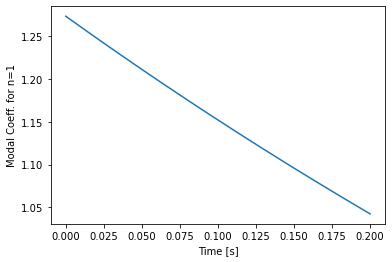

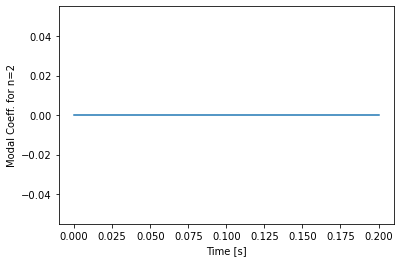

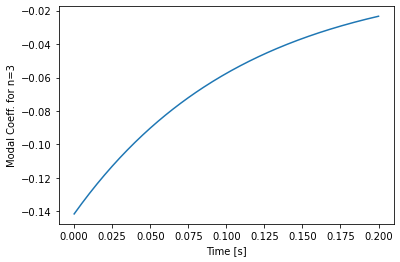

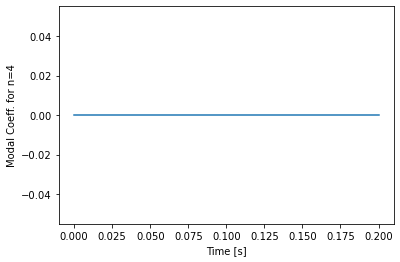

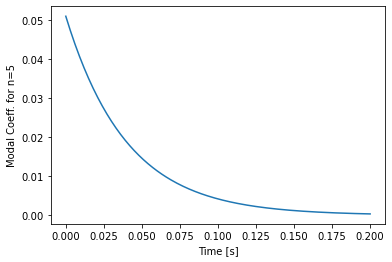

In [16]:
for n in range(1, n_coeff+1):
    plt.plot(t_vec, coeffs[:,n-1])
    plt.xlabel('Time [s]')
    plt.ylabel('Modal Coeff. for n=' + str(n))
    plt.show()

### Generate Intermediate Sine Terms: sin(nx)

In [17]:
for x in range(x_num):
    for n in range(1, n_coeff+1):
        sine_matrix[n-1, x] = math.sin(n*x_vec[x])

### Compute u(x,t)

In [18]:
for t in range(steps):
    for x in range(x_num):
        u_matrix[t,x] = np.dot(sine_matrix[:,x], coeffs[t,:])

### Plot u(x,t) over all x for t=0

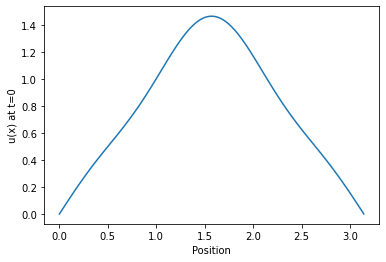

In [19]:
plt.plot(x_vec, u_matrix[0,:])
plt.xlabel('Position')
plt.ylabel('u(x) at t=0')
plt.show()

### Plot u(x,t) over all x for t=0.1

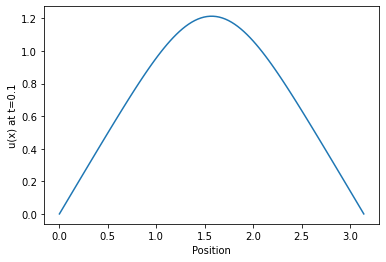

In [20]:
plt.plot(x_vec, u_matrix[100,:])
plt.xlabel('Position')
plt.ylabel('u(x) at t=0.1')
plt.show()

### Plot u(x,t) over all x for t=0.2

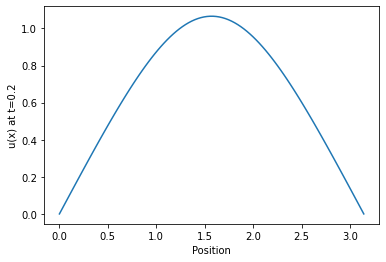

In [21]:
plt.plot(x_vec, u_matrix[-1,:])
plt.xlabel('Position')
plt.ylabel('u(x) at t=0.2')
plt.show()

### Save Modal Coefficient Matrix

In [22]:
np.save('coeffs.npy', coeffs)